# SVD analysis


In [1]:
from spectrochempy.api import *

SpectroChemPy's API - v.0.1a7.dev7+gf8a8ae49.d20171220
© Copyright 2014-2017 - A.Travert and C.Fernandez @ LCS


Dataset from spg file : NH4Y-activation.SPG 
History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)


<IPython.core.display.Javascript object>


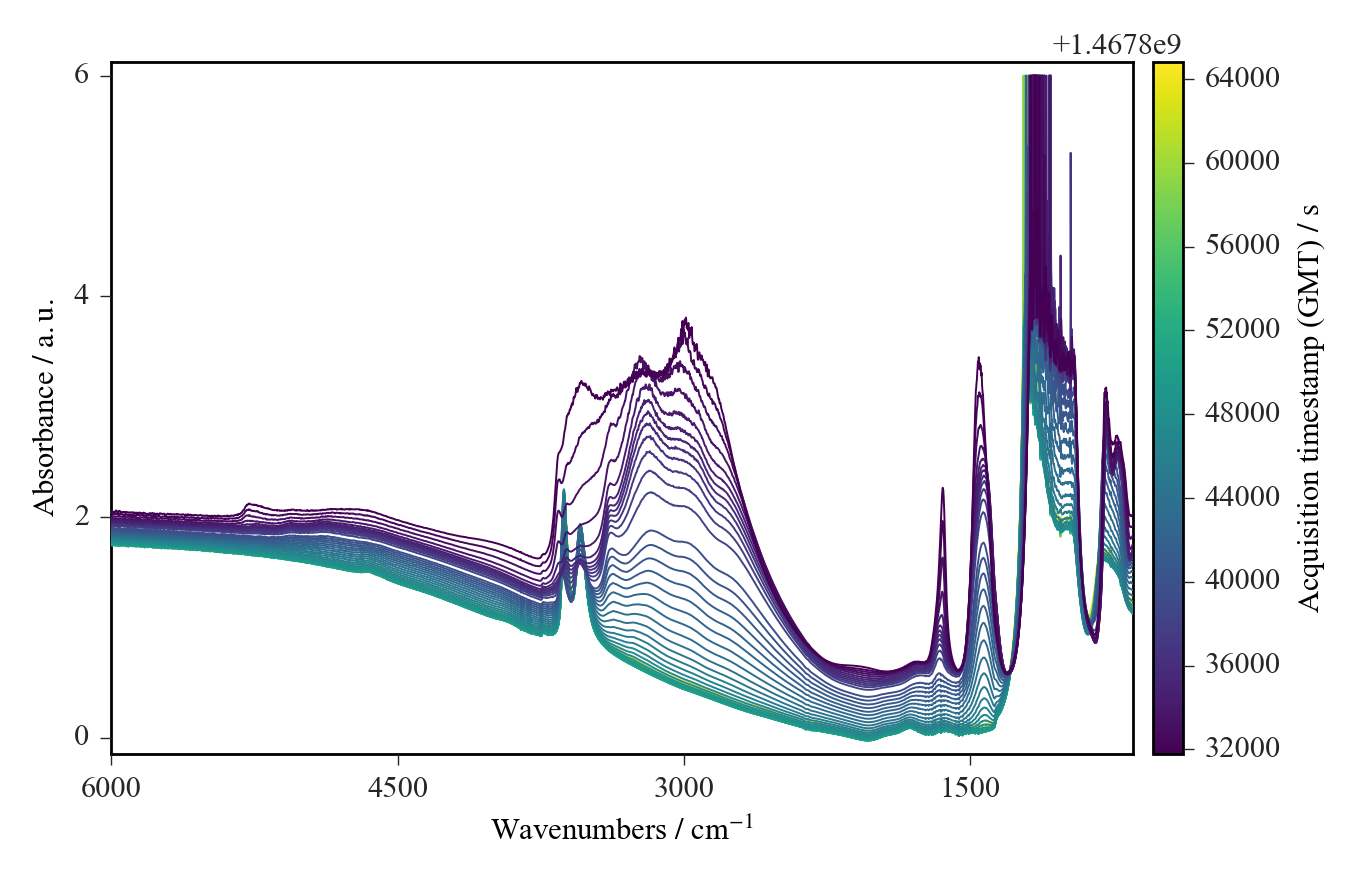

In [2]:
source = NDDataset.read_omnic(os.path.join(scpdata, 'irdata', 'NH4Y-activation.SPG'))
print(source.description)
ax = source.plot_stack()

<IPython.core.display.Javascript object>


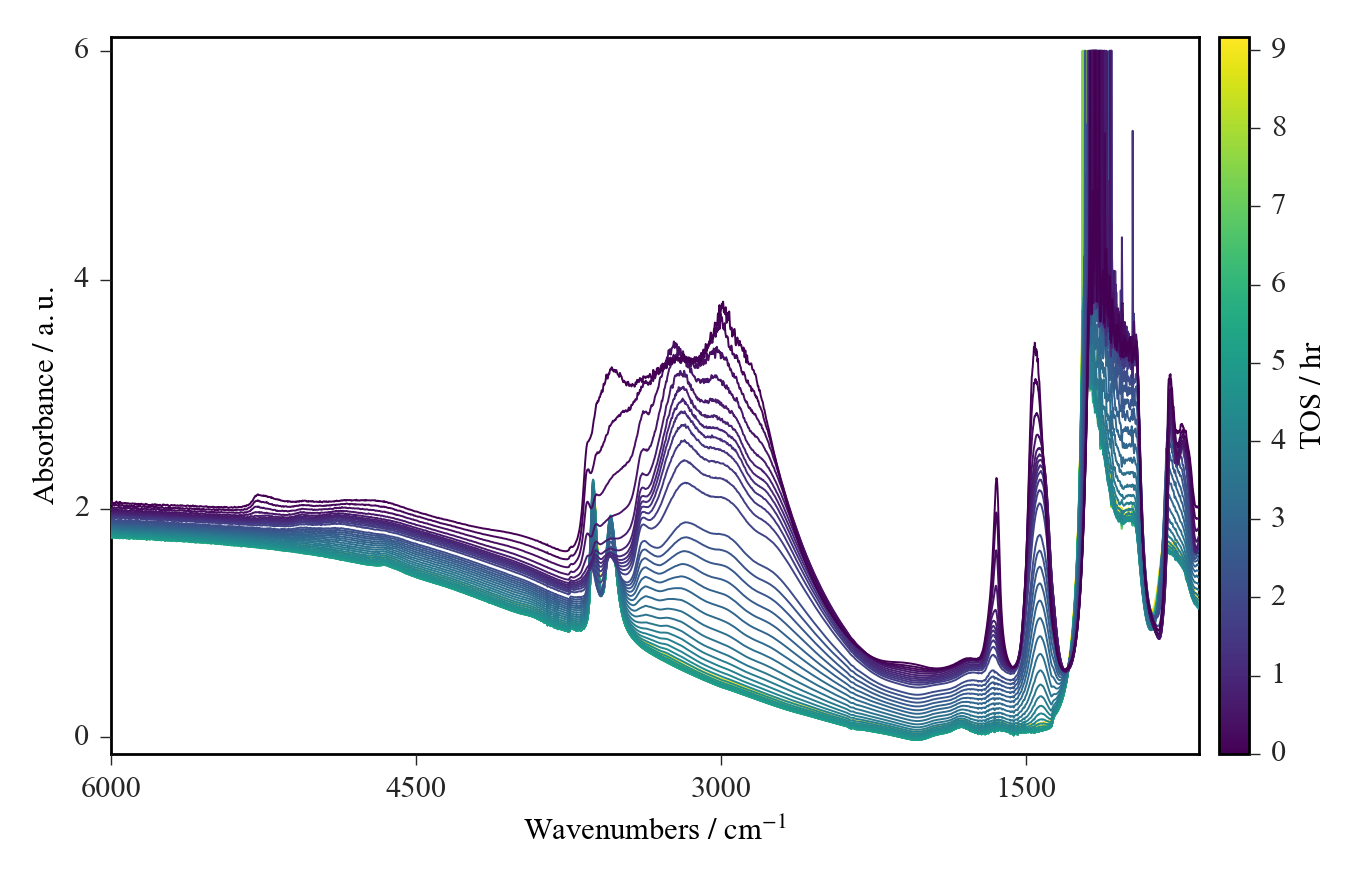

In [3]:
# make some change on the y axis ( for the colorbar in stack plot) and replot (using stack plot)
source.y -= source.y[0]
source.y.ito('hours')
source.y.title = 'TOS'
ax = source.plot(method='stack')

In [4]:
# perform SVD
svd = Svd(source)

<IPython.core.display.Javascript object>


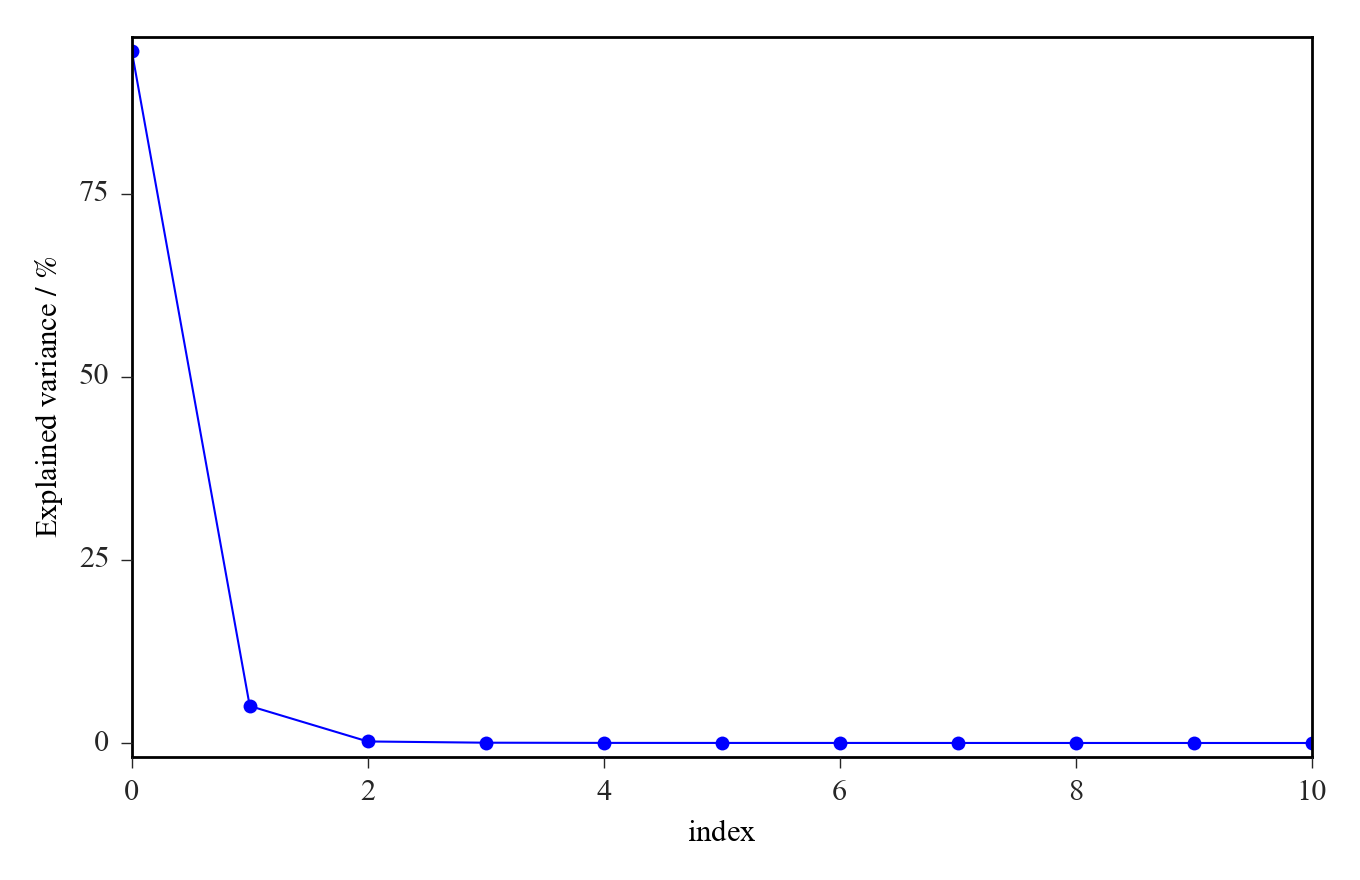

In [5]:
ax = svd.ev_ratio.plot_scatter(color='blue', lines=True, xlim=(0,10))

<IPython.core.display.Javascript object>


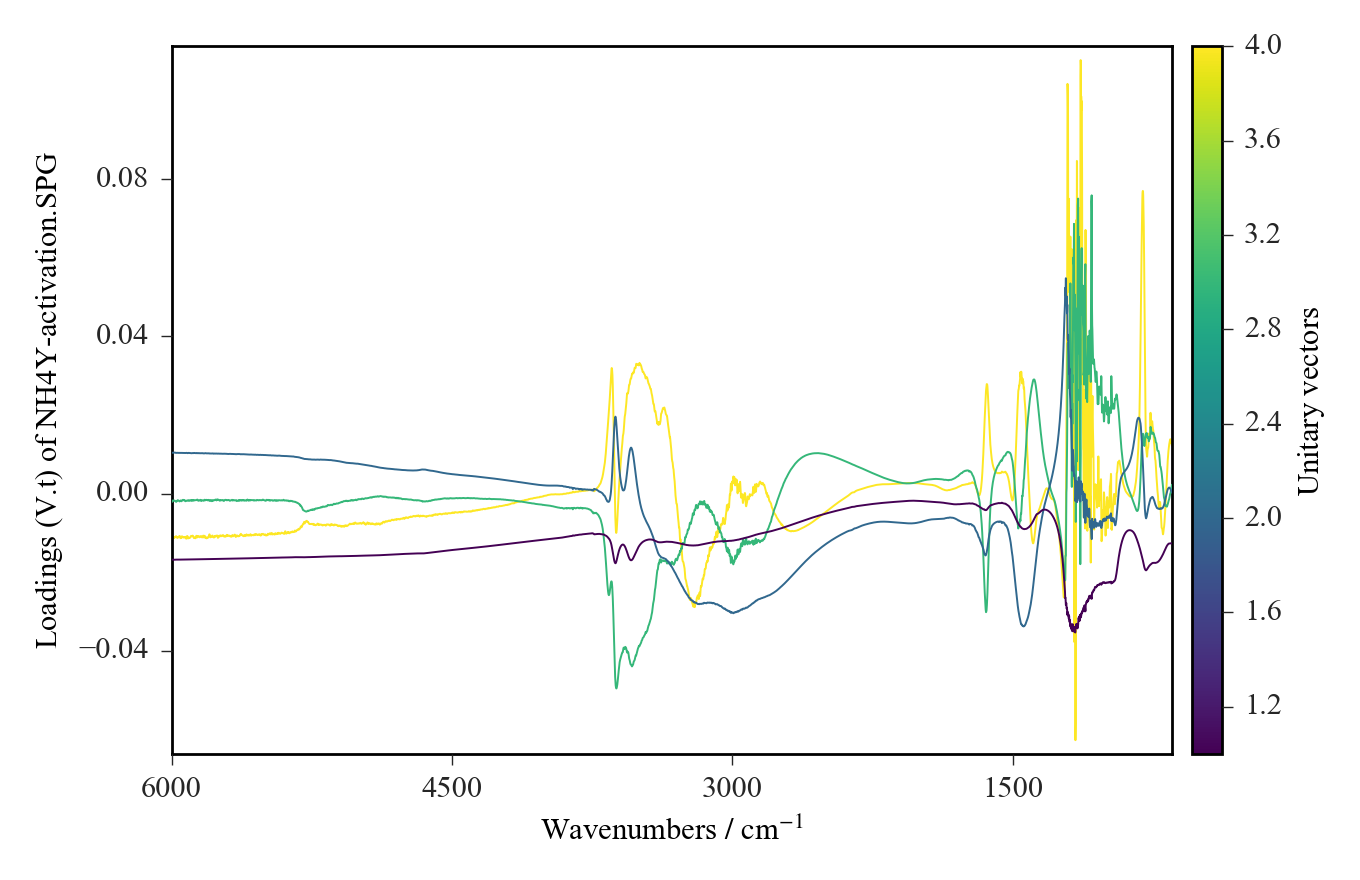

In [6]:
ax = svd.Vt[:4].plot_stack()

<IPython.core.display.Javascript object>


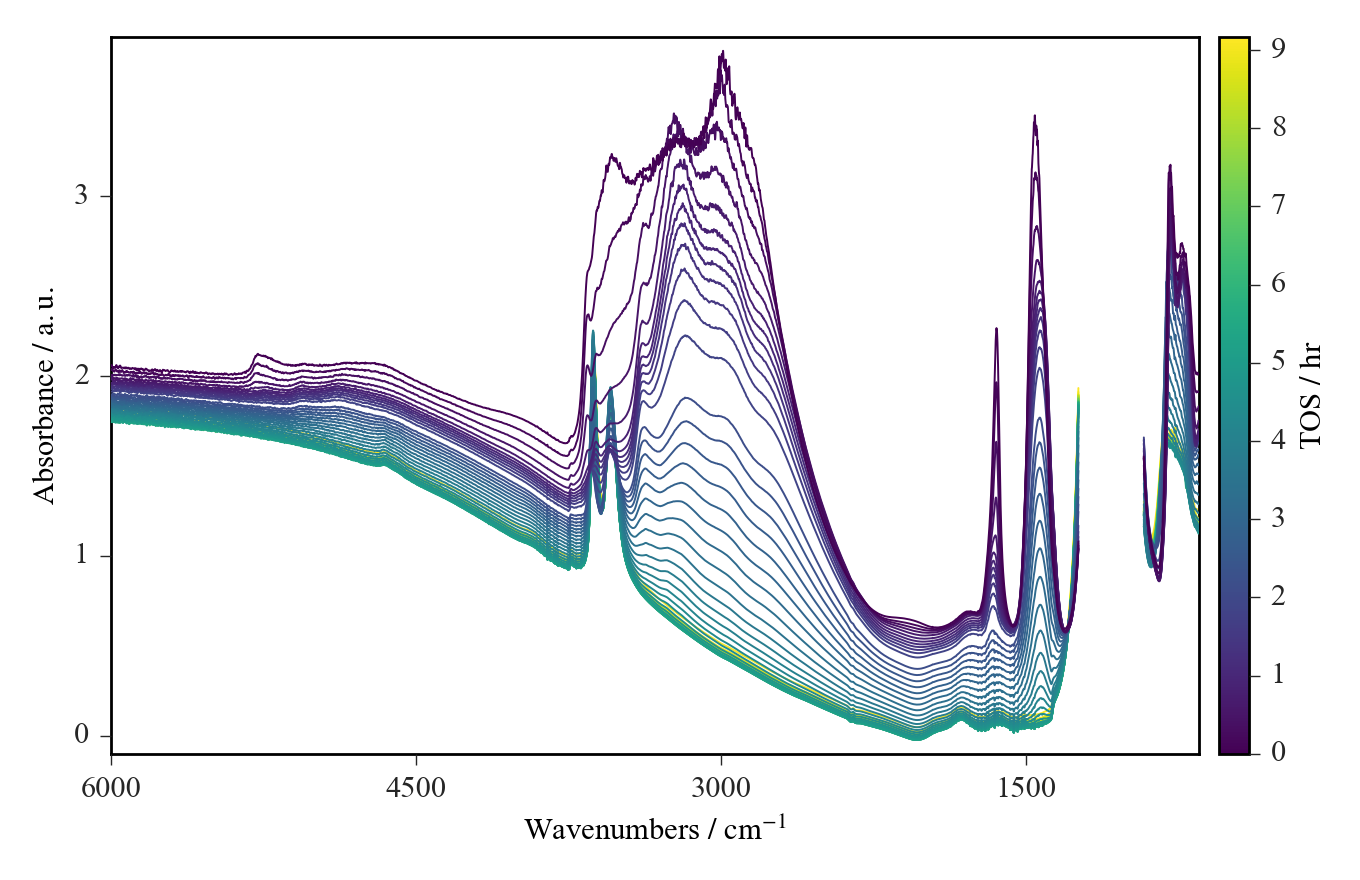

In [7]:
# mask
s2=source.copy()
s2[:, 1240.0:920.0] = masked #do not forget to use float in slicing
ax = s2.plot_stack()

<IPython.core.display.Javascript object>


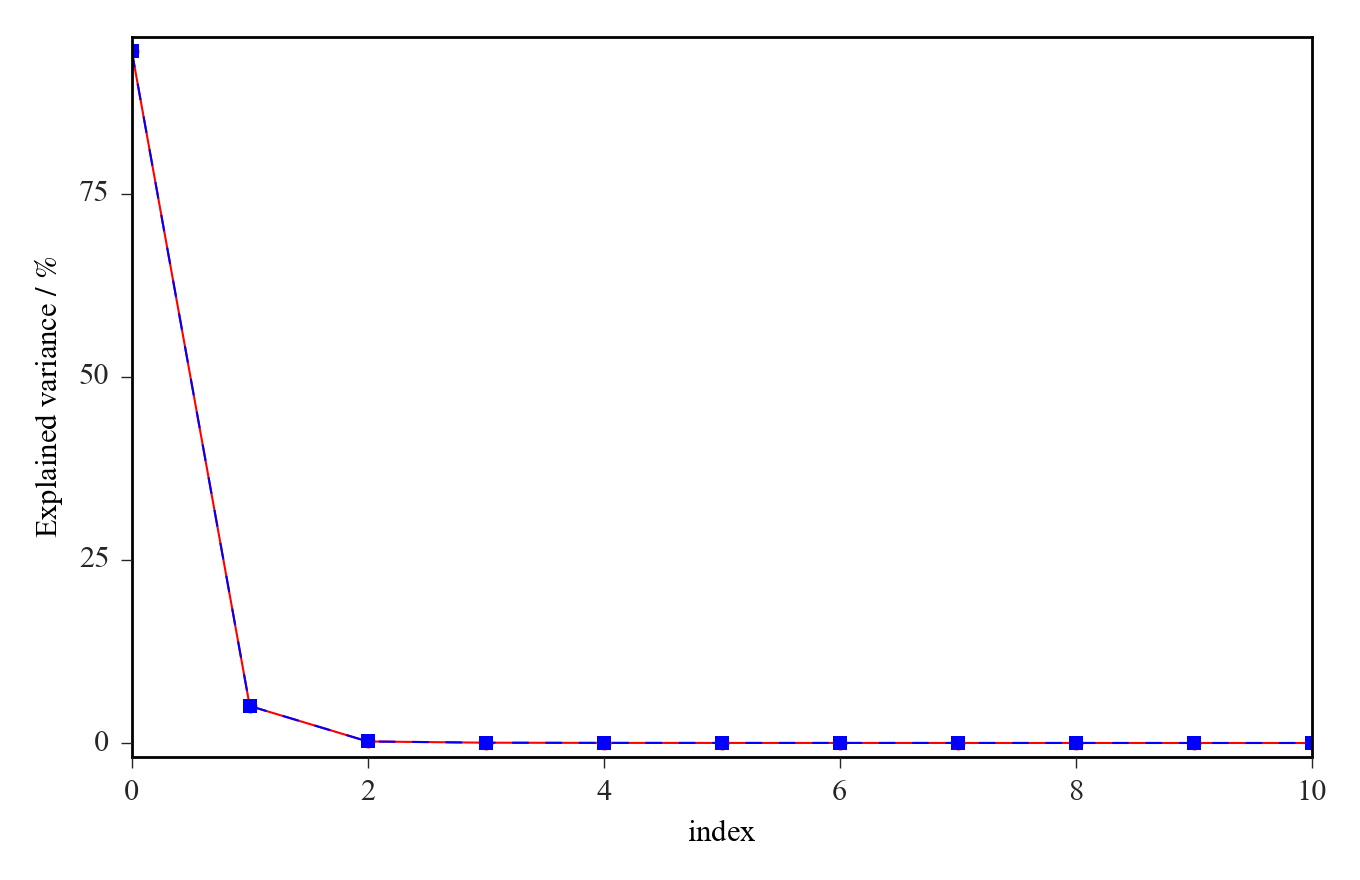

In [8]:
# perform SVD
svd2 = Svd(s2)
svd2.ev_ratio.plot_scatter(color='red', lines=True, xlim=(0,10))
# comparison
svd.ev_ratio.plot_scatter(color='blue', lines=True, xlim=(0,10), hold=True)

<IPython.core.display.Javascript object>


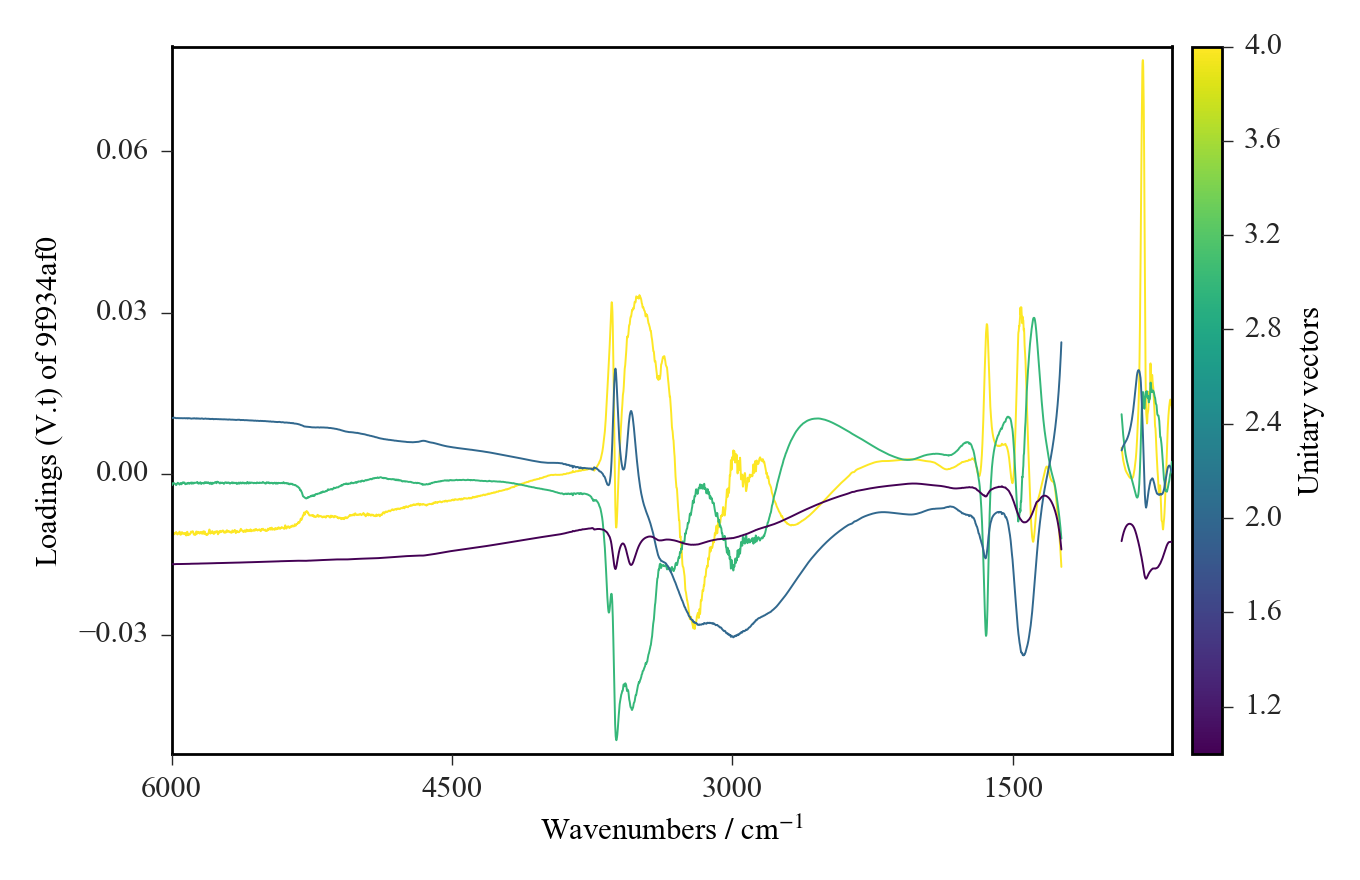

In [9]:
ax = svd2.Vt[:4].plot_stack()

In [ ]:
def screeplot(components=5):
    """scree plot of explained variance + cummulative variance by pca or svd
    :param npc: number of components to plot
    :type npc: int
    :param nfig: figure number. If None (default), a new figure is made
    :type nfig: int"""

    if nfig is None:
        plt.figure()
    else:
        plt.figure(nfig)

    plt.title('Scree plot')
    plt.xlabel('PC #')
    plt.ylabel('per PC / %')
    plt.bar(np.arange(npc), self.ev_ratio[0:npc], align='center')
    plt.twinx()
    plt.plot(np.arange(npc), self.ev_cum[0:npc], '-ro')
    plt.ylabel('cummulative / %')
    # plt.ylim((0.,100.))

    #if not _do_not_block:
    plt.show()
    #return

In [ ]:
print()
print((svd.U))
print((svd.Vt))
print((svd.s))
print((svd.ev))
print((svd.ev_cum))
print((svd.ev_ratio))


